In [1]:
import sys; sys.path.append("..")
from epi_model import *

In [2]:
#my_fn = '2000 raw_stats-alph=0.1-high school2.pickle'

In [3]:
tnets = [
    temporalNetwork.load('high school').range(1,2),
    temporalNetwork.load('high school2')
]

In [4]:
tnets[0].Nnodes

310

In [5]:
tnets[0].edgelist.shape

(94676, 3)

In [6]:
tt = temporalNetwork.load('high school')

In [7]:
times = tt.edgelist[:,0]

In [8]:
times[(times>2500)&(times<7000)].shape

(94676,)

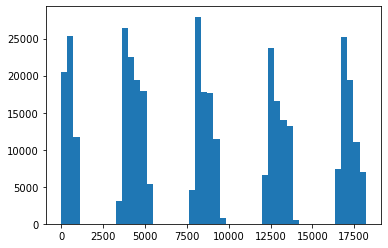

In [9]:
plt.hist(tt.edgelist[:,0], bins=50);

# params

In [10]:
daily_aranges = [0.05, 0.1, 0.15, 0.2]

In [11]:
params.covid_estimate

{'s2e': 0.0006, 'e2i': 2.3148148148148147e-05, 'i2r': 1.6534391534391536e-05}

In [12]:
ms = defaultdict(list)

In [13]:
if True:
    import pickle
    with open('2.1b full_run.pickle', 'rb') as inf:
        ms = pickle.load( inf )

In [14]:
len(ms)

264

In [15]:
len(list(ms.values())[0])

300

In [16]:

strats = [
    sampling.friendHighDegClose,
    sampling.friendClose,
    sampling.friend,
    sampling.friendHighDeg,
    sampling.targeted,
    #sampling.target_between_classes,
    sampling.local_betweenness,
    sampling.nominate_local_betweenness,
    sampling.none,
    sampling.rand,
]

for S2E in daily_aranges:
    for tneti, tnet in enumerate(tnets):
        p = dict(params.covid_estimate)
        p['s2e'] = params.daily_to_momentary(tnet, S2E)
        sim = simulations.SEIR_daily(tnet, p)

        for VACC_P in [0.05, 0.10, 0.15, 0.20]:
            N_T_VACC = int(tnet.Nnodes * VACC_P)

            for i, strat in enumerate(strats):
                NAME = strat.__name__#+("_%s" % i)
                NAME = (tneti, S2E, VACC_P, NAME)
                print("Starting on ", NAME)

                for i in range( 300 - len(ms[NAME]) ):
                    if (i+1)%20 == 0:
                        print("simulation %s" % (i+1))

                    sim.init_attributes()

                    to_vacc = strat(sim, vaccinateN=N_T_VACC)

                    for x in to_vacc:
                        sim.state_change(x, 'vacc')

                    for who in sample([x for x in range(tnet.Nnodes) if not sim.vacc[x]], 20):
                        sim.state_change(who, 'inf')

                    sim.run(100)
                    ms[NAME].append( np.array(sim.meas['inf']) + np.array(sim.meas['rec']) )

Starting on  (0, 0.05, 0.05, 'friendHighDegClose')
Starting on  (0, 0.05, 0.05, 'friendClose')
Starting on  (0, 0.05, 0.05, 'friend')
Starting on  (0, 0.05, 0.05, 'friendHighDeg')
Starting on  (0, 0.05, 0.05, 'targeted')
Starting on  (0, 0.05, 0.05, 'local_betweenness')
Starting on  (0, 0.05, 0.05, 'nominate_local_betweenness')
Starting on  (0, 0.05, 0.05, 'none')
Starting on  (0, 0.05, 0.05, 'rand')
Starting on  (0, 0.05, 0.1, 'friendHighDegClose')
Starting on  (0, 0.05, 0.1, 'friendClose')
Starting on  (0, 0.05, 0.1, 'friend')
Starting on  (0, 0.05, 0.1, 'friendHighDeg')
Starting on  (0, 0.05, 0.1, 'targeted')
Starting on  (0, 0.05, 0.1, 'local_betweenness')
Starting on  (0, 0.05, 0.1, 'nominate_local_betweenness')
Starting on  (0, 0.05, 0.1, 'none')
Starting on  (0, 0.05, 0.1, 'rand')
Starting on  (0, 0.05, 0.15, 'friendHighDegClose')
Starting on  (0, 0.05, 0.15, 'friendClose')
Starting on  (0, 0.05, 0.15, 'friend')
Starting on  (0, 0.05, 0.15, 'friendHighDeg')
Starting on  (0, 0.05

In [21]:
from pathlib import Path

In [22]:
list(Path(".").glob("*"))

[WindowsPath('.vscode'),
 WindowsPath('.ipynb_checkpoints'),
 WindowsPath('0 DESCRIPTIVES.ipynb'),
 WindowsPath('trash'),
 WindowsPath('1 covid spread parameters.ipynb'),
 WindowsPath('2 covid spread results via strats.ipynb'),
 WindowsPath('2 full_run.pickle'),
 WindowsPath('2a results.ipynb'),
 WindowsPath('2a inf_over_time.png'),
 WindowsPath('old'),
 WindowsPath('2.0 new strat -- iterative early infected.ipynb'),
 WindowsPath('01 network diagram flat.ipynb'),
 WindowsPath('1301 cool graph.ipynb'),
 WindowsPath('classes_diagram_limited.png'),
 WindowsPath('02 network diagram circular.ipynb'),
 WindowsPath('2.0 iterative.pickle'),
 WindowsPath('2.1 display strats.ipynb'),
 WindowsPath('2.1 full_run.pickle'),
 WindowsPath('2.1a full_run.pickle')]

In [27]:
%pwd

'G:\\My Drive\\2020 ORGANISATION\\0. right now right now\\31 disease contact spread\\0.1 analysis'

In [29]:
if True:
    import pickle
    with open('G:\\My Drive\\2020 ORGANISATION\\0. right now right now\\31 disease contact spread\\0.1 analysis\\2.1b full_run.pickle', 'wb') as outf:
        pickle.dump( ms, outf )

# strat table